In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid', color_codes = True)


In [66]:
train_df = pd.read_csv('C:/Users/user/Desktop/대구AI스쿨/Project/AI/DataAnalysis/DaegueAIschool/Titanic/data/train.csv')
test_df = pd.read_csv('C:/Users/user/Desktop/대구AI스쿨/Project/AI/DataAnalysis/DaegueAIschool/Titanic/data/test.csv')

In [67]:
train_df.head()
# 문제 설정
# Survived : 생존여부(생존 = 1)
# Pclass(선실 등급): 1/2/3 (categorical)
# SipSp : sibling and spouser 의 수  (배우자와 형제자매의 수)
# Parch : parent and children 의 수 (부모와 자식의 수)
# Fare : 탑승 비용
# Cabin : 선실 번호
# Embarked : 배에 승선했던 장소 (categorical)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치 Missing Value 다루기

In [71]:
# Survived : 생존여부(생존 = 1)
# Pclass(선실 등급): 1/2/3 (categorical)
# SipSp : sibling and spouser 의 수  (배우자와 형제자매의 수)
# Parch : parent and children 의 수 (부모와 자식의 수)
# Fare : 탑승 비용
# Cabin : 선실 번호
# Embarked : 배에 승선했던 장소 (categorical)

In [72]:
train_df.isnull().sum() # null 값의 갯수 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

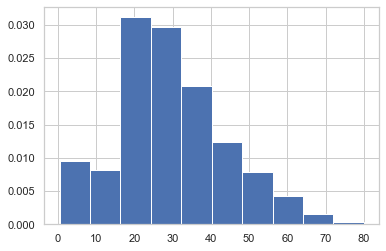

In [73]:
train_df['Age'].hist(density=True) # Age = NaN 값 임의의 값으로 대체(해당 분포 중심값, 평균....등을 일반적으로 넣는다.)

In [74]:
train_df['Age'].fillna(train_df['Age'].median(skipna=True), inplace=True)

In [75]:
train_df.drop('Cabin', axis=1, inplace=True) # Cabin 삭제

In [76]:
train_df['Embarked'].value_counts() # Embarked 구성 갯수 확인

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [77]:
train_df['Embarked'].fillna('S', inplace=True) # Embarked 구성중 많은 S로 널값 대체

In [78]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [79]:
# test dataset의 결측치 Missing Value 다루기
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

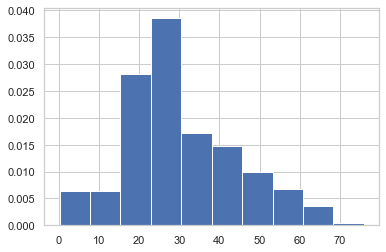

In [80]:
test_df['Age'].hist(density=True)

In [81]:
test_df['Age'].fillna(test_df['Age'].median(skipna=True), inplace=True)

In [82]:
test_df.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

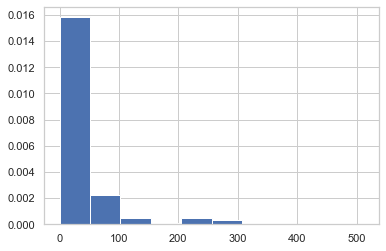

In [83]:
test_df['Fare'].hist(density=True)

In [84]:
test_df['Fare'].fillna(test_df['Fare'].median(skipna=True), inplace=True)

In [85]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [86]:
# 분석에 필요 없는 컬럼 열 삭제
train_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
test_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [87]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [88]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [89]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [90]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [91]:
# categorical 변수 변환
train_data = pd.get_dummies(train_df, columns=['Pclass','Sex','Embarked'])
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [92]:
# categorical 변수 변환
test_data = pd.get_dummies(test_df, columns=['Pclass','Sex','Embarked'])
test_data.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [93]:
train_data.drop(['Pclass_3','Sex_male','Embarked_S'], axis=1, inplace=True)

In [94]:
test_data.drop(['Pclass_3','Sex_male','Embarked_S'], axis=1, inplace=True)

In [108]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,0,22.0,1,0,7.2500,0,0,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,0,0,0,0


In [109]:
test_data.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Sex_female,Embarked_C,Embarked_Q
0,34.5,0,0,7.8292,0,0,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,0
2,62.0,0,0,9.6875,0,1,0,0,1
3,27.0,0,0,8.6625,0,0,0,0,0
4,22.0,1,1,12.2875,0,0,1,0,0


In [97]:
# 생존 여부에 따라 attribute 분포에 차이가 있는지?
# logistic regression 사용
# 학습시킨 logistic regression을 확인하여 변수의 유용성 확인
# confusion matrix 그려서 점수 도출

생존한 남성: 109, 여성: 233


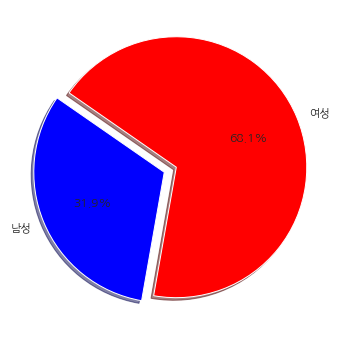

생존하지 못한 남성: 468, 여성: 81


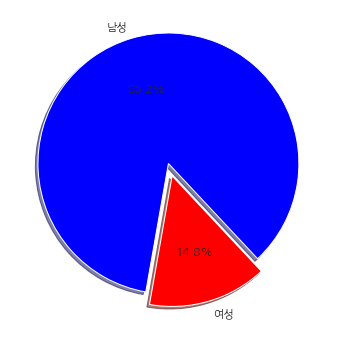

In [164]:
# 생존 여부에 따라 attribute 분포에 차이가 있는지?
plt.rc('font', family='NanumGothic')

S_1= train_data['Survived'] == 1 # 생존한 사람
S_2 = train_data['Sex_female'] == 0 # 생존한 사람의 성별(남자)
print(f'생존한 남성: {len(train_data[S_1 & S_2])}, 여성: {len(train_data[S_1 & ~S_2])}')

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ratio = [len(train_data[S_1 & S_2]),len(train_data[S_1 & ~S_2])]
labels = ['남성', '여성']
explode = [0.05, 0.05]
colors = ['blue', 'red']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

print(f'생존하지 못한 남성: {len(train_data[~S_1 & S_2])}, 여성: {len(train_data[~S_1 & ~S_2])}')
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ratio = [len(train_data[~S_1 & S_2]),len(train_data[~S_1 & ~S_2])]
labels = ['남성', '여성']
explode = [0.05, 0.05]
colors = ['blue', 'red']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

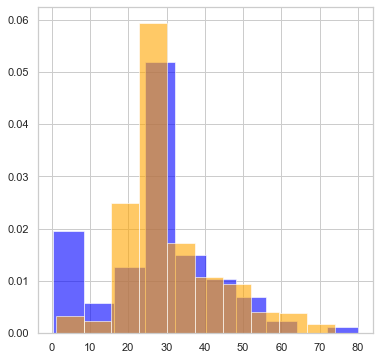

In [149]:
# 남성 생존 유무에 따른 나이 분포

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
S_M  = train_data[S_1 & S_2]
S_W  = train_data[S_1 & ~S_2]
NS_M = train_data[~S_1 & S_2]
NS_W =train_data[~S_1 & ~S_2]

S_M['Age'].hist(density=True, color='blue', alpha=0.6, ax = ax)
NS_M['Age'].hist(density=True, color='orange', alpha=0.6, ax = ax)
# S_W['Age'].hist(density=True, color='red', alpha=0.6, ax = ax)
# NS_W['Age'].hist(density=True, color='green', alpha=0.6, ax = ax)

plt.show()

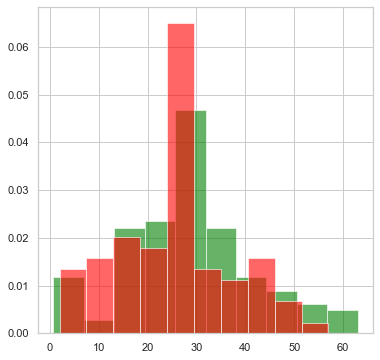

In [147]:
# 여성 생존 유무에 따른 나이 분포

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
S_1.plot()
plt.show()

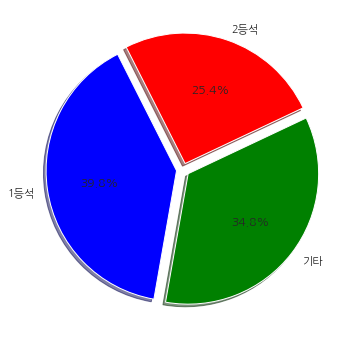

객실 등급에 따른 생존자 수 (1등급) : 136
객실 등급에 따른 생존자 수 (2등급) : 87
객실 등급에 따른 생존자 수 (기타) 119


In [184]:
# 생존자 객실 등급 분포

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
S_3 = train_data['Pclass_1']
S_4 = train_data['Pclass_2']
ratio = [len(train_data[S_1 & S_3]),len(train_data[S_1 & S_4]), len(train_data[S_1 & ~S_3 &~S_4])]
labels = ['1등석', '2등석', '기타']
explode = [0.05, 0.05, 0.05]
colors = ['blue', 'red','green']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()
print(f'객실 등급에 따른 생존자 수 (1등급) : {len(train_data[S_1 & S_3])}')
print(f'객실 등급에 따른 생존자 수 (2등급) : {len(train_data[S_1 & S_4])}')
print(f'객실 등급에 따른 생존자 수 (기타) {len(train_data[S_1 & ~S_3 & ~S_4])}')

In [182]:
from sklearn.linear_model import LogisticRegression